In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import os


os.chdir("/home/sambray/Documents/MS_analysis_samsplaying")
from spyglass.decoding.v1.sorted_spikes import SortedSpikesDecodingV1
from AnalysisTables.place_fields import SortedDecodingGroup, OptoPlaceField, PlaceFieldCoverage
from Style.style_guide import animal_style

from Analysis.utils import filter_opto_data

/home/sambray/mambaforge-pypy3/envs/spyglass2025/lib/python3.10/site-packages/non_local_detector/likelihoods/clusterless_kde.py:4: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm
[2025-08-11 10:32:20,064][INFO]: Connecting sambray@lmf-db.cin.ucsf.edu:3306
[2025-08-11 10:32:20,105][INFO]: Connected sambray@lmf-db.cin.ucsf.edu:3306


# Plots

[2025-08-11 10:33:03,714][WARNING]: MySQL server has gone away. Reconnecting to the server.


datasets: 17


/home/sambray/mambaforge-pypy3/envs/spyglass2025/lib/python3.10/site-packages/hdmf/spec/namespace.py:583: UserWarning: Ignoring the following cached namespace(s) because another version is already loaded:
core - cached version: 2.6.0-alpha, loaded version: 2.8.0
ndx-franklab-novela - cached version: 0.1.0, loaded version: 0.2.1
The loaded extension(s) may not be compatible with the cached extension(s) in the file. Please check the extension documentation and ignore this warning if these versions are compatible.
  self.warn_for_ignored_namespaces(ignored_namespaces)
/home/sambray/mambaforge-pypy3/envs/spyglass2025/lib/python3.10/site-packages/hdmf/spec/namespace.py:583: UserWarning: Ignoring the following cached namespace(s) because another version is already loaded:
core - cached version: 2.6.0-alpha, loaded version: 2.8.0
ndx-franklab-novela - cached version: 0.1.0, loaded version: 0.2.1
The loaded extension(s) may not be compatible with the cached extension(s) in the file. Please che

0628c60d-6516-b141-70f5-c2c6fce7f9d9_4 2
0628c60d-6516-b141-70f5-c2c6fce7f9d9_5 2
9f541b0d-1596-cff0-42d9-660c12463087_1 1
9f541b0d-1596-cff0-42d9-660c12463087_3 1
ae1ea40f-5f68-4832-979d-9d970db63509_0 1
d6de818f-ee10-f5dc-29fa-308f11964f9b_0 1
d6de818f-ee10-f5dc-29fa-308f11964f9b_1 1
0628c60d-6516-b141-70f5-c2c6fce7f9d9_0 1
0628c60d-6516-b141-70f5-c2c6fce7f9d9_1 1
0628c60d-6516-b141-70f5-c2c6fce7f9d9_2 1
9f541b0d-1596-cff0-42d9-660c12463087_4 1
0628c60d-6516-b141-70f5-c2c6fce7f9d9_3 0
866be067-9d33-6f57-9765-fc567c7209b5_2 0
9f541b0d-1596-cff0-42d9-660c12463087_0 0
9f541b0d-1596-cff0-42d9-660c12463087_8 0
a52584e7-e94d-36e9-1205-e34d54ee2a27_1 0
a52584e7-e94d-36e9-1205-e34d54ee2a27_2 0
a52584e7-e94d-36e9-1205-e34d54ee2a27_3 0
ae1ea40f-5f68-4832-979d-9d970db63509_2 1
9c9d5973-ae91-e024-848d-21a9ce0b1545_2 2
a9294335-6ab1-05c9-7d57-cd2923c62500_2 2
d6c71228-ee8c-bec7-5047-2907969ef17b_2 0
16a1f675-bbff-e3d8-b7fe-ea265bd250c3_5 1
b30ed29d-40d6-3d87-d47f-9fb5985763fc_1 1
d6c71228-ee8c-be

/home/sambray/mambaforge-pypy3/envs/spyglass2025/lib/python3.10/site-packages/hdmf/spec/namespace.py:583: UserWarning: Ignoring the following cached namespace(s) because another version is already loaded:
core - cached version: 2.6.0-alpha, loaded version: 2.8.0
ndx-franklab-novela - cached version: 0.1.0, loaded version: 0.2.1
The loaded extension(s) may not be compatible with the cached extension(s) in the file. Please check the extension documentation and ignore this warning if these versions are compatible.
  self.warn_for_ignored_namespaces(ignored_namespaces)
/home/sambray/mambaforge-pypy3/envs/spyglass2025/lib/python3.10/site-packages/hdmf/spec/namespace.py:583: UserWarning: Ignoring the following cached namespace(s) because another version is already loaded:
core - cached version: 2.6.0-alpha, loaded version: 2.8.0
ndx-franklab-novela - cached version: 0.1.0, loaded version: 0.2.1
The loaded extension(s) may not be compatible with the cached extension(s) in the file. Please che

0e5d7ae6-f6ea-0501-5682-773bca597bdf_2 2
4cf6c066-586b-22c6-fdaa-586e4a355f93_3 2
55c8be08-7629-756e-ebee-32911e5d281d_0 2
5c88e47c-9148-869a-76a2-f3ff73a97094_3 2
5c88e47c-9148-869a-76a2-f3ff73a97094_4 2
5c88e47c-9148-869a-76a2-f3ff73a97094_5 2
80553d68-cae3-ff24-5fc2-1f5e80bca1fe_2 2
a3dcc010-bb4f-4d7a-0513-01fedf2fc6e3_1 1
a3dcc010-bb4f-4d7a-0513-01fedf2fc6e3_2 2
cffc4b70-eb12-0e8c-db2c-d7c060f3de10_0 1
dd4110da-85f0-72a9-e85b-38ca03fca553_1 1
55c8be08-7629-756e-ebee-32911e5d281d_2 0
55c8be08-7629-756e-ebee-32911e5d281d_3 0
5c8821c2-8aa0-eac4-5dc8-6639cecda4de_0 0
80553d68-cae3-ff24-5fc2-1f5e80bca1fe_1 0
0760e023-2262-d7e5-5db5-477ceebfc428_0 2
0760e023-2262-d7e5-5db5-477ceebfc428_1 2
1eb524e8-b1b2-f813-90d7-8cfeb6e25851_4 2
35673f73-38e1-7c32-4c4b-8bf0f6819cd1_0 1
5b78ceb4-f34a-f33c-6028-6c3f93af3dfa_0 2
5b78ceb4-f34a-f33c-6028-6c3f93af3dfa_2 1
6683c431-54a3-1b54-c95e-db49850a4838_4 1
6683c431-54a3-1b54-c95e-db49850a4838_7 2
838d1c07-af25-de0a-e741-f1b917f3800e_3 2
838d1c07-af25-de

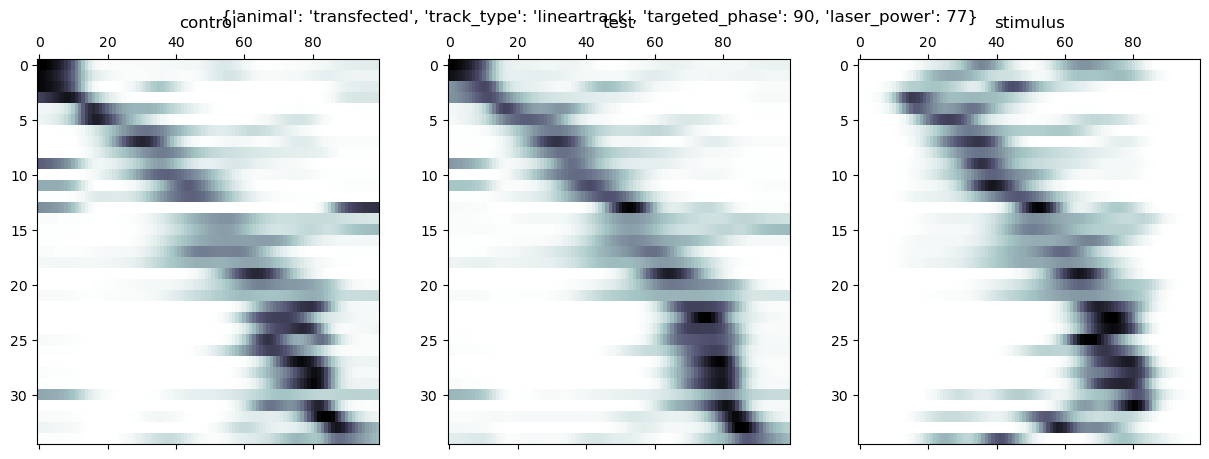

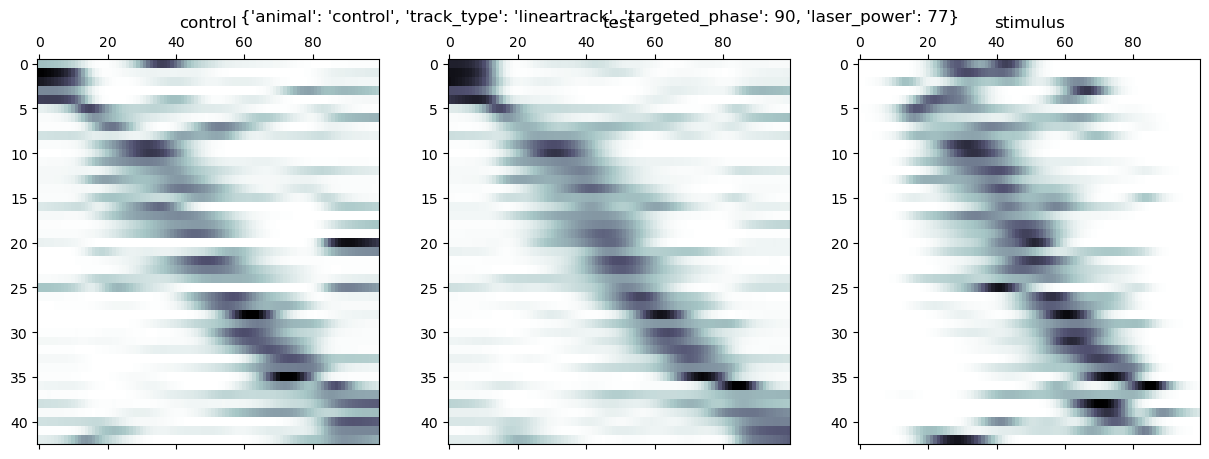

In [3]:
coverage_thresh = 50
dlc = False
animal = "Winnie"
animal = "Yoshi"
# animal = "Totoro"
animal = "Frodo"
animal = "Olive"
animal = "control"
animal = "transfected"

animal_list = ["transfected", "control"]
# animal_list =  ["control","transfected"]
# animal_list = animal_style.index
# animal_list = [a for a in animal_list if a not in ["Banner","Odins","control","transfected"]]

# wtrack settings
min_spikes = 10
max_spikes = 3000
interpolate = 200
coverage_thresh = 50
min_coverage = 5
track_type = "early_wtrack"

# #linear track settings
min_spikes = 100
max_spikes = 1000
interpolate = 100
coverage_thresh = 20
min_coverage = 5
track_type = "lineartrack"

corr_results = {}  # KL between test and control
stim_corr_results = {}  # KL between contro; and stimulus on times
for animal in animal_list:
    dataset_key = {
        "animal": animal,
        "track_type": track_type,
        # "period_ms": 100,
        # "track_type": "lineartrack",
        "targeted_phase": 90,
        "laser_power": 77,
    }

    dataset = filter_opto_data(dataset_key)
    key_list = []
    for nwb_file_name, interval in zip(
        *dataset.fetch("nwb_file_name", "interval_list_name")
    ):
        key_list.append(
            {
                "nwb_file_name": nwb_file_name,
                "decode_group_name": "DLC " + interval if dlc else interval,
            }
        )
    table = OptoPlaceField() & key_list
    df = table.fetch_dataframe()
    table
    coverage_table = PlaceFieldCoverage & key_list & {"unit_coverage_params_name": "50"}
    coverage_df = coverage_table.fetch_dataframe()
    df = df.merge(coverage_df, on=["unit_id", "condition"])
    df = df[df.coverage < coverage_thresh]
    df = df[df.coverage > min_coverage]

    test_field = []
    control_field = []
    stimulus_field = []

    for unit in df.unit_id.unique():
        unit_table = df.query("encoding_spike_count > @min_spikes and unit_id == @unit")
        if not len(unit_table) == 3:
            print(unit, len(unit_table))
            continue

        for condition in df.condition.unique():
            if condition == "test":
                test_field.append(
                    df.query(
                        f"unit_id == '{unit}' and condition == '{condition}'"
                    ).place_field.values[0]
                )
            elif condition == "control":
                control_field.append(
                    df.query(
                        f"unit_id == '{unit}' and condition == '{condition}'"
                    ).place_field.values[0]
                )
            elif condition == "stimulus":
                stimulus_field.append(
                    df.query(
                        f"unit_id == '{unit}' and condition == '{condition}'"
                    ).place_field.values[0]
                )

    if interpolate:
        test_field = [
            np.interp(np.linspace(0, 1, interpolate), np.linspace(0, 1, len(f)), f)
            for f in test_field
        ]
        control_field = [
            np.interp(np.linspace(0, 1, interpolate), np.linspace(0, 1, len(f)), f)
            for f in control_field
        ]
        stimulus_field = [
            np.interp(np.linspace(0, 1, interpolate), np.linspace(0, 1, len(f)), f)
            for f in stimulus_field
        ]
    test_field = np.array(test_field)
    control_field = np.array(control_field)
    stimulus_field = np.array(stimulus_field)

    # calculate correlation of field between test and control condition
    var_list = [x - x.mean(axis=1, keepdims=True) for x in [control_field, test_field]]
    var_list = [x / np.linalg.norm(x, axis=1, keepdims=True) for x in var_list]
    cond_correlation = (var_list[0] * var_list[1]).sum(axis=1)
    # corr_results[animal] = cond_correlation
    kl = (control_field * np.log(control_field / test_field)).sum(axis=1)
    kl = (test_field * np.log(test_field / control_field)).sum(axis=1)
    corr_results[animal] = kl

    # calculate correlation of field between control and stimulus condition
    kl = (control_field * np.log(control_field / stimulus_field)).sum(axis=1)
    kl = (stimulus_field * np.log(stimulus_field / control_field)).sum(axis=1)
    stim_corr_results[animal] = kl

    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    ind = np.argsort(np.argmax(control_field, axis=1))
    ind = np.argsort(np.argmax(test_field, axis=1))
    for i, field in enumerate([control_field, test_field, stimulus_field]):
        ax[i].matshow(field[ind], aspect="auto", cmap="bone_r", clim=(0, 0.1))
        ax[i].set_title(["control", "test", "stimulus"][i])
    fig.suptitle(dataset_key)
    plt.rcParams["svg.fonttype"] = "none"
    # fig.savefig(
    #     "/home/sambray/Documents/MS_analysis_samsplaying/Figures_20241201/placeFields_"
    #     + str(dataset_key)
    #     + ".svg"
    # )
    # fig.savefig(
    #     "/home/sambray/Documents/MS_analysis_samsplaying/Figures_20250501/placeFields_"
    #     + str(dataset_key)
    #     + ".svg"
    # )

transfected (35,)
control (43,)


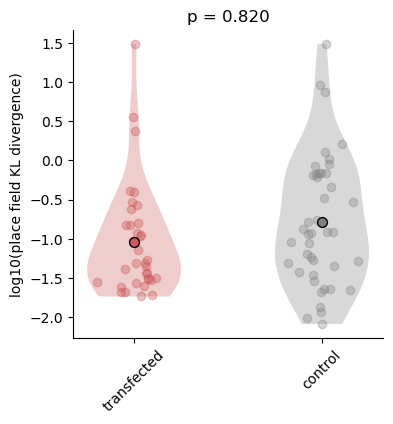

In [4]:
from Analysis.utils import violin_scatter

fig = plt.figure(figsize=(4, 4))
ax = plt.gca()
plot_log = True

for i, (animal, corr) in enumerate(corr_results.items()):
    val = corr
    if plot_log:
        val = np.log10(corr)
    print(animal, val.shape)
    violin_scatter(val, pos=[i], color=animal_style.loc[animal, "color"], bw_method=0.5)
    plt.scatter(
        [i],
        val.mean(),
        facecolor=animal_style.loc[animal, "color"],
        edgecolor="k",
        s=50,
    )
    # violin_scatter(corr, pos=[i], color = animal_style.loc[animal,"color"])
# plt.yscale("log")

ax.spines[["right", "top"]].set_visible(False)
if plot_log:
    plt.ylabel("log10(place field KL divergence)", fontsize=10)
else:
    plt.ylabel("place field KL divergence, control/test interval", fontsize=10)

from scipy.stats import ttest_ind

p_val = ttest_ind(corr_results["control"], corr_results["transfected"])[1]
plt.title(f"p = {p_val:.3f}")

plt.xticks(range(len(corr_results)), corr_results.keys(), rotation=45)

plt.rcParams["svg.fonttype"] = "none"
# fig.savefig(
#     f"/home/sambray/Documents/MS_analysis_samsplaying/Figures_20241201/kl_change_placeField_{dataset_key}.svg"
# )

# fig.savefig(
#     f"/home/sambray/Documents/MS_analysis_samsplaying/Figures_20250501/kl_change_placeField_{dataset_key}.svg"
# )

transfected (35,)
control (43,)


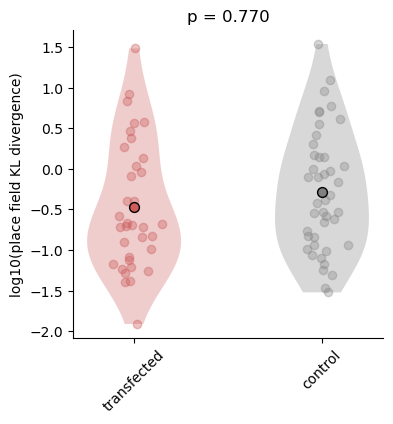

In [5]:
from Analysis.utils import violin_scatter

fig = plt.figure(figsize=(4, 4))
ax = plt.gca()
plot_log = True

for i, (animal, corr) in enumerate(stim_corr_results.items()):
    val = corr
    if plot_log:
        val = np.log10(corr)
    print(animal, val.shape)
    violin_scatter(val, pos=[i], color=animal_style.loc[animal, "color"], bw_method=0.5)
    plt.scatter(
        [i],
        val.mean(),
        facecolor=animal_style.loc[animal, "color"],
        edgecolor="k",
        s=50,
    )
    # violin_scatter(corr, pos=[i], color = animal_style.loc[animal,"color"])
# plt.yscale("log")

ax.spines[["right", "top"]].set_visible(False)
if plot_log:
    plt.ylabel("log10(place field KL divergence)", fontsize=10)
else:
    plt.ylabel("place field KL divergence, control/test interval", fontsize=10)

from scipy.stats import ttest_ind

p_val = ttest_ind(stim_corr_results["control"], stim_corr_results["transfected"])[1]
plt.title(f"p = {p_val:.3f}")

plt.xticks(range(len(stim_corr_results)), stim_corr_results.keys(), rotation=45)

plt.rcParams["svg.fonttype"] = "none"
fig.savefig(
    f"/home/sambray/Documents/MS_analysis_samsplaying/Figures_20250210/kl_change_placeField_stimOn_{dataset_key}.svg"
)

# Dev

In [2]:
coverage_thresh = 50
dlc = False
animal = "Winnie"
animal = "Yoshi"
# animal = "Totoro"
animal = "Frodo"
animal = "Olive"
animal = "control"
animal = "transfected"

dataset_key = {
    "animal": animal,
    "track_type": "early_wtrack",
    # "period_ms": 100,
    # "track_type": "lineartrack",
}


dataset = filter_opto_data(dataset_key)

key_list = []
for nwb_file_name, interval in zip(
    *dataset.fetch("nwb_file_name", "interval_list_name")
):
    key_list.append(
        {
            "nwb_file_name": nwb_file_name,
            "decode_group_name": "DLC " + interval if dlc else interval,
        }
    )


# key_list = {"nwb_file_name":"Winnie20220719_.nwb", "decode_group_name":"DLC pos 13 valid times"}

table = OptoPlaceField() & key_list
df = table.fetch_dataframe()
# df = table.fetch_nwb()[0]['place']
table
coverage_table = PlaceFieldCoverage & key_list & {"unit_coverage_params_name": "50"}
coverage_df = coverage_table.fetch_dataframe()

df = df.merge(coverage_df, on=["unit_id", "condition"])
df = df[df.coverage < coverage_thresh]

datasets: 44


0d949a11-ed64-4ee3-1261-c0312ff05367_11 1
16a41e40-403d-71d4-69b8-fb751abc0caf_0 2
dc5616ef-5019-9403-3ae9-1f2507e3e5ab_2 2
0d949a11-ed64-4ee3-1261-c0312ff05367_3 1
dc5616ef-5019-9403-3ae9-1f2507e3e5ab_3 1
0f88fa68-7cb6-ddd0-ec65-250d682fed96_3 1
0f88fa68-7cb6-ddd0-ec65-250d682fed96_10 2
1e66b888-331b-cfcb-b127-daca7c88403c_1 1
83a38586-cace-19b8-1de9-881be1585ffb_1 1
9c9ef132-b170-1e0a-8a14-f2186ee1ca80_1 1
afb85504-8221-d2b5-0d21-d1daec2c1144_5 1
5b12c8e1-c9de-3315-cd7c-a356bcfbb800_2 2
5b12c8e1-c9de-3315-cd7c-a356bcfbb800_3 2
5b12c8e1-c9de-3315-cd7c-a356bcfbb800_8 1
5f8dae06-44e2-344b-b66d-e696242fba93_0 1
8663369b-7b71-cbbd-3b27-8bff70717442_0 2
8c0bba7a-ecdf-5511-da15-5a9a1f33e6db_4 1
8c0bba7a-ecdf-5511-da15-5a9a1f33e6db_5 2
8c0bba7a-ecdf-5511-da15-5a9a1f33e6db_7 2
af883ecd-c1af-93a4-48b8-bd5e7a6108a4_2 1
c8c359e9-b683-4603-41c7-082023d05e40_2 1
c8c359e9-b683-4603-41c7-082023d05e40_5 2
0bab5250-2053-a9cd-a5fe-f9e61b137164_1 2
5461b4b1-2fac-4a2d-3b0e-fd22ace9aa88_4 1
55b1f5e3-d75f-

Text(0.5, 0.98, "{'animal': 'transfected', 'track_type': 'early_wtrack'}")

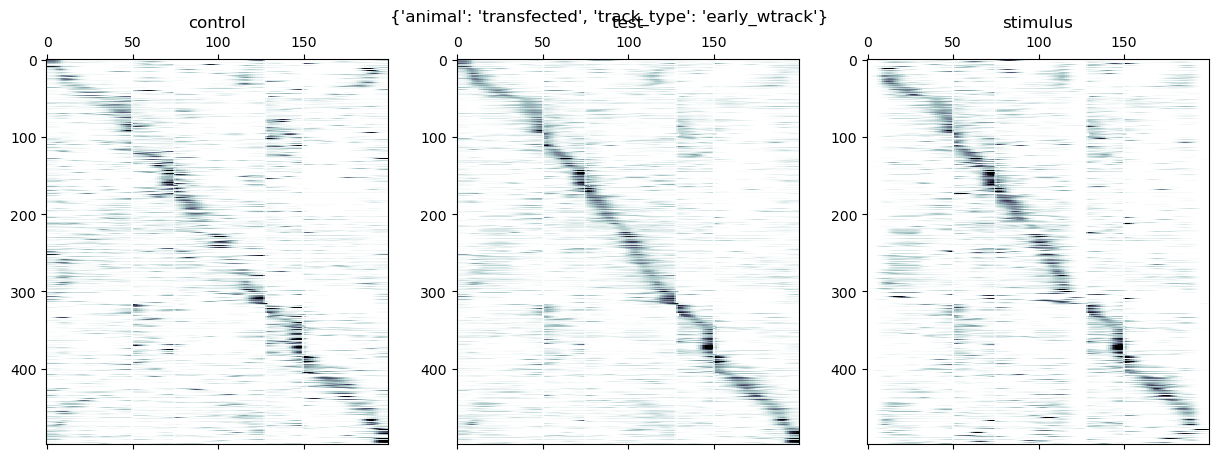

In [3]:
test_field = []
control_field = []
stimulus_field = []

min_spikes = 10
max_spikes = 3000
interpolate = 200
for unit in df.unit_id.unique():
    unit_table = df.query("encoding_spike_count > @min_spikes and unit_id == @unit")
    if not len(unit_table) == 3:
        print(unit, len(unit_table))
        continue

    for condition in df.condition.unique():
        if condition == "test":
            test_field.append(
                df.query(
                    f"unit_id == '{unit}' and condition == '{condition}'"
                ).place_field.values[0]
            )
        elif condition == "control":
            control_field.append(
                df.query(
                    f"unit_id == '{unit}' and condition == '{condition}'"
                ).place_field.values[0]
            )
        elif condition == "stimulus":
            stimulus_field.append(
                df.query(
                    f"unit_id == '{unit}' and condition == '{condition}'"
                ).place_field.values[0]
            )

if interpolate:
    test_field = [
        np.interp(np.linspace(0, 1, interpolate), np.linspace(0, 1, len(f)), f)
        for f in test_field
    ]
    control_field = [
        np.interp(np.linspace(0, 1, interpolate), np.linspace(0, 1, len(f)), f)
        for f in control_field
    ]
    stimulus_field = [
        np.interp(np.linspace(0, 1, interpolate), np.linspace(0, 1, len(f)), f)
        for f in stimulus_field
    ]
test_field = np.array(test_field)
control_field = np.array(control_field)
stimulus_field = np.array(stimulus_field)

# calculate correlation of field between test and control condition
var_list = [x - x.mean(axis=1, keepdims=True) for x in [control_field, test_field]]
var_list = [x / np.linalg.norm(x, axis=1, keepdims=True) for x in var_list]
cond_correlation = (var_list[0] * var_list[1]).sum(axis=1)

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ind = np.argsort(np.argmax(control_field, axis=1))
ind = np.argsort(np.argmax(test_field, axis=1))
for i, field in enumerate([control_field, test_field, stimulus_field]):
    ax[i].matshow(field[ind], aspect="auto", cmap="bone_r", clim=(0, 0.1))
    ax[i].set_title(["control", "test", "stimulus"][i])
fig.suptitle(dataset_key)

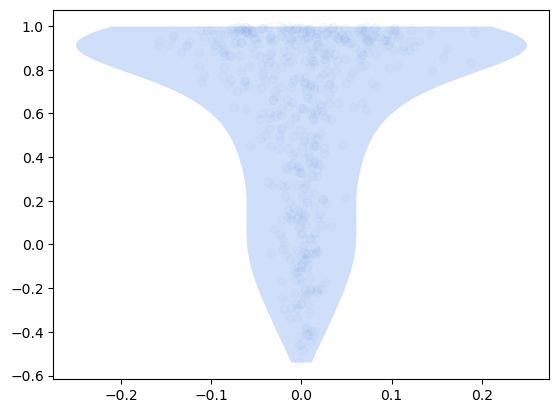

In [6]:
from Analysis.utils import violin_scatter

var_list = [x - x.mean(axis=1, keepdims=True) for x in [control_field, test_field]]
var_list = [x / np.linalg.norm(x, axis=1, keepdims=True) for x in var_list]
cond_correlation = (var_list[0] * var_list[1]).sum(axis=1)
violin_scatter(cond_correlation)

In [86]:
OptoPlaceField()

nwb_file_name name of the NWB file,decode_group_name,analysis_file_name name of the file,place_object_id
Bilbo20230802_.nwb,DLC pos 1 valid times,Bilbo20230802_TDZRP2IN64.nwb,2324490b-6e75-467f-acf4-1c7dd1beeba6
Bilbo20230802_.nwb,DLC pos 11 valid times,Bilbo20230802_18NDW65QPP.nwb,a1deede2-3486-4c64-9e30-8e096eebaff2
Bilbo20230802_.nwb,DLC pos 13 valid times,Bilbo20230802_S3TC5WEPQB.nwb,607f5dd9-fe3e-48a4-b427-05073ad43c97
Bilbo20230802_.nwb,DLC pos 15 valid times,Bilbo20230802_IVRUVM3B9I.nwb,df07ea73-4489-4924-9331-050ac48c0b4a
Bilbo20230802_.nwb,DLC pos 3 valid times,Bilbo20230802_GDNEP0HFX2.nwb,6370db58-4d08-4416-83ac-4346993790f5
Bilbo20230802_.nwb,DLC pos 5 valid times,Bilbo20230802_RA693OCN71.nwb,1c854cbd-2ea4-4638-94e1-78934127a535
Bilbo20230802_.nwb,DLC pos 9 valid times,Bilbo20230802_OIZW8WSKPM.nwb,f87c6020-45d1-42bc-8619-b5c171727ee9
Bilbo20230802_.nwb,pos 1 valid times,Bilbo20230802_31XGFK1WEV.nwb,3d8ab754-028f-4e21-b521-0d6c7072675a
Bilbo20230802_.nwb,pos 11 valid times,Bilbo20230802_WCSY75NA2Y.nwb,726458e3-30bc-444f-a548-b2e828d65fb3
Bilbo20230802_.nwb,pos 13 valid times,Bilbo20230802_KICTTGY8UF.nwb,2c0d4d35-a88a-4d8d-ac12-1df5808e9ef5
